In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

items = pd.read_csv('../input/items.csv')
test = pd.read_csv('../input/test.csv')
sales = pd.read_csv('../input/sales_train.csv')
item_categories = pd.read_csv('../input/item_categories.csv')
shops = pd.read_csv('../input/shops.csv')

sales['date'] = pd.to_datetime(sales['date'], format='%d.%m.%Y')

su_sub = pd.read_csv('../input/sample_submission.csv')

ITEM_MAX = su_sub.ID.max()

['items.csv', 'sample_submission.csv', 'test.csv', 'sales_train.csv', 'item_categories.csv', 'shops.csv']


In [2]:
items = pd.read_csv('../input/items.csv')
test = pd.read_csv('../input/test.csv')
sales = pd.read_csv('../input/sales_train.csv')
item_categories = pd.read_csv('../input/item_categories.csv')
shops = pd.read_csv('../input/shops.csv')

print('items shape           : {}'.format(items.shape))
print('sales shape     : {}'.format(sales.shape))
print('item_categories shape : {}'.format(item_categories.shape))
print('shops shape           : {}'.format(shops.shape))
print('test shape            : {}'.format(test.shape))

items shape           : (22170, 3)
sales shape     : (2935849, 6)
item_categories shape : (84, 2)
shops shape           : (60, 2)
test shape            : (214200, 3)


In [3]:
print('items columns            :  {}'.format(tuple(items.columns)))
print('sales columns      :  {}'.format(tuple(sales.columns)))
print('item_categories columns  :  {}'.format(tuple(item_categories.columns)))
print('shops columns            :  {}'.format(tuple(shops.columns)))
print('test columns             :  {}'.format(tuple(test.columns)))

items columns            :  ('item_name', 'item_id', 'item_category_id')
sales columns      :  ('date', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day')
item_categories columns  :  ('item_category_name', 'item_category_id')
shops columns            :  ('shop_name', 'shop_id')
test columns             :  ('ID', 'shop_id', 'item_id')


In [4]:
su_sub = pd.read_csv('../input/sample_submission.csv')

ITEM_MAX = su_sub.ID.max()

su_sub.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [5]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [6]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [7]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [8]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [9]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [10]:
sales.sample(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2290720,24.12.2014,23,4,19789,249.0,1.0
575219,01.06.2013,5,3,4910,419.0,1.0
2118218,02.11.2014,22,28,15503,449.0,1.0
71375,25.01.2013,0,31,14432,149.0,1.0
1562901,22.04.2014,15,57,18452,199.0,1.0
2821515,23.08.2015,31,31,10216,149.0,2.0
2704492,05.06.2015,29,4,19116,399.0,1.0
651497,24.07.2013,6,37,11669,199.0,2.0
703497,23.07.2013,6,58,2934,599.0,1.0
769747,10.08.2013,7,57,2641,299.0,1.0


In [11]:
sales['date'].dtype

dtype('O')

In [12]:
sales['date'] = pd.to_datetime(sales['date'], format='%d.%m.%Y')
sales.sample(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1185761,2013-12-24,11,19,16056,699.0,1.0
2726375,2015-07-19,30,15,2422,1199.0,1.0
2727123,2015-07-08,30,18,4706,299.0,2.0
616118,2013-06-28,5,57,16901,499.0,1.0
996573,2013-10-26,9,59,15446,479.0,1.0
2775758,2015-08-07,31,42,2140,349.0,1.0
955013,2013-10-12,9,31,10658,599.0,2.0
1280000,2014-01-23,12,57,14841,199.0,1.0
1470982,2014-03-25,14,43,1459,1199.0,1.0
2593186,2015-04-16,27,59,16167,799.0,1.0


#### What is date_block_num?

In [13]:
sales.date_block_num.value_counts()

11    143246
23    130786
2     121347
0     115690
1     108613
7     104772
6     100548
5     100403
12     99349
10     96736
8      96137
9      94202
3      94109
14     92733
4      91759
13     89830
24     88522
19     86614
22     86428
17     82408
21     79361
18     78760
16     78529
15     77906
20     73157
25     71808
26     69977
31     57029
27     56274
30     55549
29     54617
28     54548
33     53514
32     50588
Name: date_block_num, dtype: int64

In [14]:
sales.date[sales.date_block_num == 0]

0        2013-01-02
1        2013-01-03
2        2013-01-05
3        2013-01-06
4        2013-01-15
5        2013-01-10
6        2013-01-02
7        2013-01-04
8        2013-01-11
9        2013-01-03
10       2013-01-03
11       2013-01-05
12       2013-01-07
13       2013-01-08
14       2013-01-10
15       2013-01-11
16       2013-01-13
17       2013-01-16
18       2013-01-26
19       2013-01-27
20       2013-01-09
21       2013-01-16
22       2013-01-27
23       2013-01-27
24       2013-01-29
25       2013-01-27
26       2013-01-06
27       2013-01-26
28       2013-01-02
29       2013-01-06
            ...    
115660   2013-01-21
115661   2013-01-12
115662   2013-01-08
115663   2013-01-05
115664   2013-01-06
115665   2013-01-04
115666   2013-01-11
115667   2013-01-24
115668   2013-01-18
115669   2013-01-20
115670   2013-01-29
115671   2013-01-17
115672   2013-01-12
115673   2013-01-08
115674   2013-01-04
115675   2013-01-03
115676   2013-01-02
115677   2013-01-14
115678   2013-01-15


It is a number assigned to each and every month 

In [15]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


#### shop_id

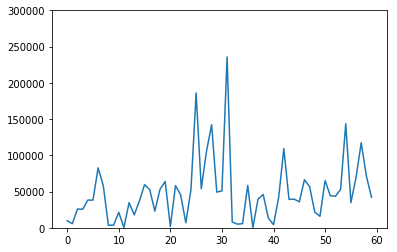

In [16]:
sales.shop_id.value_counts().sort_index().plot(ylim=(0, 300000))

In [17]:
len(sales.shop_id[sales.shop_id == 36]), len(sales.shop_id[sales.shop_id == 11])

(306, 499)

#### item_id

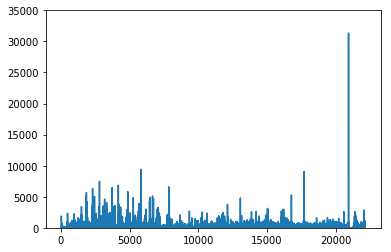

In [18]:
sales.item_id.value_counts().sort_index().plot(ylim=(0,35000))

In [19]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


#### Add for all item_id in a particular date_block_num
* to get item_cnt_month

In [20]:
sales.groupby(['date_block_num', 'item_id']).item_cnt_day.sum()

date_block_num  item_id
0               19           1.0
                27           7.0
                28           8.0
                29           4.0
                32         299.0
                33          61.0
                34           9.0
                35          78.0
                40           4.0
                41           9.0
                42           2.0
                43           2.0
                44           6.0
                45           8.0
                46           2.0
                47           6.0
                48           7.0
                49           5.0
                50           2.0
                51          13.0
                52           7.0
                53           8.0
                54           6.0
                55           4.0
                56           1.0
                57           1.0
                59          18.0
                60           6.0
                61           2.0
                63 

#### Take the october 2015, last date_block_num and use it as prediction for submission

In [21]:
# october 2015, is last date_block_num
sales.date_block_num.max()

33

In [22]:
# take date_block_num == 33, and 
# sum all the items sales and 
# create item_cnt_month for 33, for all item_ids

pred = sales[sales.date_block_num == 33].groupby(['shop_id', 'item_id']).item_cnt_day.sum()
pred.head()

shop_id  item_id
2        31         1.0
         486        3.0
         787        1.0
         794        1.0
         968        1.0
Name: item_cnt_day, dtype: float64

In [23]:
# clip the values into [0,20] range
pred = pred.clip(0, 20)
pred.head()

shop_id  item_id
2        31         1.0
         486        3.0
         787        1.0
         794        1.0
         968        1.0
Name: item_cnt_day, dtype: float64

In [24]:
pred = pd.DataFrame(pred)
pred.head()

item_cnt_day
shop_id item_id              
2       31                1.0
        486               3.0
        787               1.0
        794               1.0
        968               1.0

In [25]:
# Merge test and pred, how='left' keeps all the IDs in left DataFrame
pred2 = pd.merge(test, pred, how='left', on=['shop_id', 'item_id']).fillna(0.)
pred2 = pred2.rename(index=str, columns={'item_cnt_day': 'item_cnt_month'})
pred2.sample(10)

,ID,shop_id,item_id,item_cnt_month
49758,49758,31,19041,1.0
202601,202601,44,20405,0.0
204781,204781,39,13277,2.0
108304,108304,50,7669,0.0
23875,23875,2,14845,0.0
25189,25189,2,13132,0.0
183865,183865,34,16788,1.0
32890,32890,10,16177,0.0
164689,164689,36,17168,0.0
123555,123555,52,8704,0.0


In [26]:
pred2.to_csv('submission.csv', columns=['ID', 'item_cnt_month'], index=False)

In [27]:
pd.read_csv('submission.csv')

,ID,item_cnt_month
0,0,0.0
1,1,0.0
2,2,1.0
3,3,0.0
4,4,0.0
5,5,1.0
6,6,2.0
7,7,0.0
8,8,0.0
9,9,0.0


In [28]:
#pred1 = pd.DataFrame(pred, index=range(ITEM_MAX + 1)).fillna(0.)
#pred1 = pred1.rename(index=str, columns={'item_cnt_day': 'item_cnt_month'})
#pred1.head()

In [29]:
#pred1[pred1.item_cnt_month != 0].head()

In [30]:
#pred1.to_csv('submission.csv', index_label='ID')

In [31]:
#pd.read_csv('submission.csv')

In [32]:
su_sub.ID.max()

214199

In [33]:
sales.item_id.max(), sales.item_id.nunique()

(22169, 21807)

In [34]:
sales.shop_id.max(), sales.shop_id.nunique()

(59, 60)

In [35]:
22170 * 60, 21807 * 60

(1330200, 1308420)

In [36]:
sales.groupby(['shop_id'])['item_id'].nunique().sum()

424124